In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('yield_df.csv')
df.drop(['Unnamed: 0'], axis=1 , inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.shape

(28242, 7)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [9]:
df['Area'].nunique()

101

In [10]:
df['Item'].nunique()

10

In [11]:
df['Year'].unique() 

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

In [12]:
df['hg/ha_yield'].agg([np.max , np.min])

amax    501412
amin        50
Name: hg/ha_yield, dtype: int64

In [13]:
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Area']


2470    Belgium
Name: Area, dtype: object

In [14]:
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ] ['Area']

26174    Tajikistan
Name: Area, dtype: object

In [15]:
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Year']


2470    2011
Name: Year, dtype: int64

In [16]:
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ] ['Year']


26174    1992
Name: Year, dtype: int64

In [17]:
df_temp_prod = df[['avg_temp' , 'hg/ha_yield']]
df_temp_prod.corr(method = 'pearson')

,avg_temp,hg/ha_yield
avg_temp,1.000000,-0.114777
hg/ha_yield,-0.114777,1.000000


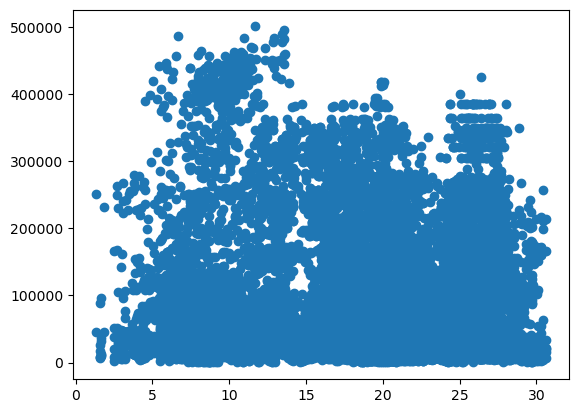

In [18]:
plt.scatter(x= 'avg_temp' , y= 'hg/ha_yield' , data = df)
plt.show()

In [19]:
df_rain_prod = df[['average_rain_fall_mm_per_year' , 'hg/ha_yield']]
df_rain_prod.corr(method = 'pearson')

,average_rain_fall_mm_per_year,hg/ha_yield
average_rain_fall_mm_per_year,1.000000,0.000962
hg/ha_yield,0.000962,1.000000


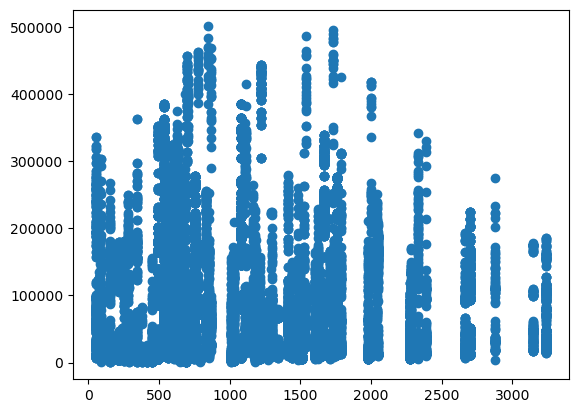

In [20]:
plt.scatter(x = 'average_rain_fall_mm_per_year' , y= 'hg/ha_yield' , data = df)
plt.show()

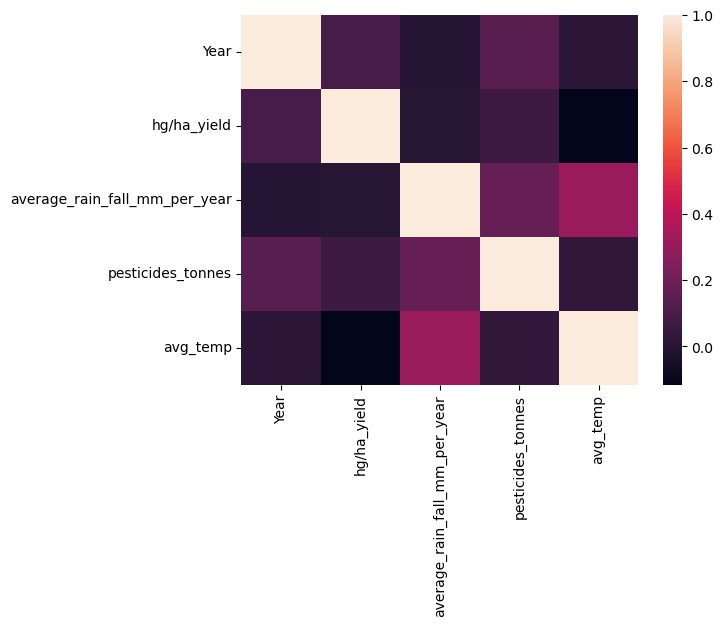

In [21]:
sns.heatmap(df.corr())
plt.show()

In [22]:
df_ohe = pd.get_dummies(df, columns=['Area',"Item"])
df_ohe.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.0,16.37,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,66667,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,23333,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,12500,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,7000,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']
df_ohe[cols]= sc.fit_transform(df_ohe[cols])
df_ohe.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,-1.637075,36613,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,66667,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,23333,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,12500,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,7000,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
y = df_ohe['hg/ha_yield']
X= df_ohe.drop('hg/ha_yield',axis=1)
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
score = r2_score(y_test,y_pred)
x_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
25564,0.915472,-0.722818,0.060744,-0.527988,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18113,-0.786226,0.512742,-0.615849,-0.131913,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25607,1.199088,-0.722818,0.032791,-0.638889,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6815,0.773663,2.945823,0.756569,1.094335,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18144,-0.218994,0.512742,-0.616208,-0.141419,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674,-0.502610,2.945823,0.393779,0.400412,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8786,-0.928035,-0.397374,0.782786,-1.402521,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9527,-0.928035,1.193216,-0.418171,-0.089137,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18956,1.199088,1.256614,-0.606185,0.653899,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
import pickle
RF_pkl_filename = 'crop_yield.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(dt, RF_Model_pkl)
RF_Model_pkl.close()